## 1. Binary Perceptron

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from matplotlib.pyplot import figure
import random

### (a) Write code for two functions:
    • The first function takes as input parameters w, b of a linear classifier as well as a data point x, and returns the label for that point: sign(w · x + b). The label is either +1 or −1.
    • The second function takes as input an array of data points and an array of labels (where each label is +1 or −1), and runs the Perceptron algorithm to learn a linear classifier w,b. The algorithm should begin by randomly permuting the data points.
    In your writeup, give the code for these two functions.

In [2]:
def predict(weights, bias, input):
    a = np.sign(np.dot(np.transpose(weights), input) + bias)
    if a >= 0:
        label = 1
    else:
        label = -1
    return label

def train(inputs, labels):
    n_samples, n_features = inputs.shape
    
    weights = np.zeros(n_features)
    bias = 0.0
    
    while True:
        errors = 0
        for i in range(n_samples):
            if (predict(weights, bias, inputs[i]) != labels[i]):
                errors += 1
                weights += labels[i] * inputs[i]
                bias += labels[i]
        if errors == 0:
            break
    return weights, bias

### (b) Load in the Iris data set.
    The data has four features and three labels. Restrict it to features 1 and 3 (the second and fourth columns, sepal width and petal width) and to labels 0,1. Recode label 0 as −1, since this is what the Perceptron algorithm is expecting.

In [3]:
iris = datasets.load_iris() 
x = iris.data
y = iris.target

In [4]:
x_inputs = x[0:100, [1, 3]]
y_restrict = y[y != 2]
y_labels = np.where(y_restrict == 0, -1, y_restrict)
x_inputs.shape, y_labels.shape

((100, 2), (100,))

### (c) Now run the Perceptron algorithm on the data. In your writeup, show a plot with the data points (where the two labels have different colors) and the resulting decision boundary.

In [5]:
weights, bias = train(x_inputs, y_labels)

In [6]:
weights, bias

(array([-0.3,  1.2]), 0.0)

In [7]:
slope = - weights[0]/weights[1]
x2cut = - bias/weights[1]

print('weights: ', weights)
print('bias: ', bias)
print('classifier line: x2 = %s*x1%s' % (slope, x2cut))

weights:  [-0.3  1.2]
bias:  0.0
classifier line: x2 = 0.24999999999999986*x1-0.0


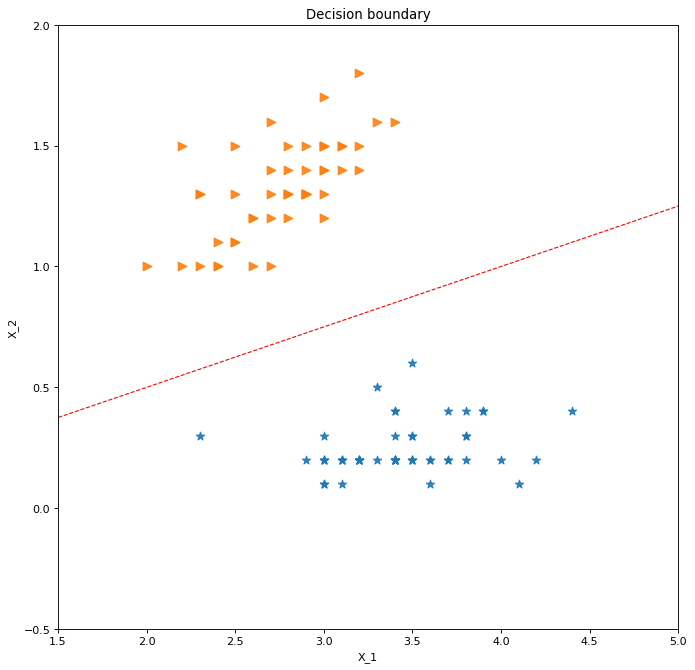

In [8]:
# Plot the data and the classification with the decision boundary.
xmin, xmax = 1.5, 5
ymin, ymax = -0.5, 2

xd = np.array([xmin, xmax])
yd = slope*xd + x2cut

figure(figsize=(10, 10), dpi=80)

plt.title('Decision boundary')
plt.xlabel('X_1')
plt.ylabel('X_2')

plt.plot(xd, yd, 'r', lw=1, ls='--')

plt.scatter(*x_inputs[:,[0,1]][y_labels==-1].T, s = 60, alpha = 0.9, marker = '*')
plt.scatter(*x_inputs[:,[0,1]][y_labels==1].T, s = 60, alpha = 0.9, marker = '>')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

### (d) Now modify your code from part (a) to count the number of updates made by the Perceptron algorithm while it is learning. Run the algorithm 20 times and keep track of the number of updates needed each time. In your writeup, include a histogram of these values.

In [9]:
def train_d(inputs, labels):
    n_samples, n_features = inputs.shape
    weights = np.zeros(n_features)
    bias = 0.0
    n = 0
    while True:
        errors = 0
        for i in range(n_samples):
            if (predict(weights, bias, inputs[i]) != labels[i]):
                errors += 1
                weights += labels[i] * inputs[i]
                bias += labels[i]
                n += 1
        if errors == 0:
            break
    return weights, bias, n

In [10]:
num = []

for i in range(0, 20):
    y_reshape = y_labels.reshape(100,1)

    data=np.hstack((x_inputs,y_reshape))
    np.random.shuffle(data)
    
    x_inputs_s = data[:, 0:2]
    y_labels_s = data[:, -1]

    weights_d, bias_d, n = train_d(x_inputs_s, y_labels_s)
    num.append(n)
num

[2, 4, 19, 19, 15, 2, 10, 15, 23, 2, 2, 11, 17, 19, 11, 16, 7, 13, 6, 17]

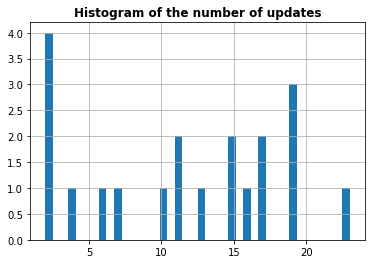

In [11]:
n_bins = 40
x = num
  
plt.hist(x, n_bins, density = False, histtype = 'bar')
plt.title('Histogram of the number of updates', fontweight = "bold")
plt.grid()
plt.show()